#<strong>CH 18. 선형자료구조</strong>
---

일렬로 늘어선 자료들(배열 등..)은 동적 배열과 연결리스트로 저장 가능

<div class="markdown-google-sans">

## 18.2 동적 배열
---

배열 문제 : 배열 선언 시 배열 크기 지정 -> 배열 크기 이상의 자료 넣기 불가

문제 해결 : <strong>동적 배열</strong>(dynamic array)

동적 배열 특징

- 배열로부터 이어받은 특징
 * 원소들은 메모리의 연속된 위치에 저장
 * 주어진 위치의 원소 반환/변경 동작은 O(1)에 가능

- 동적 배열이 배열과 다르게 갖는 특징
 * <strong> resize() </strong> 연산 &rarr; 배열의 크기를 변경   
   * 동작 수행 시간 : 배열 크기 N에 비례
 * <strong> append() </strong> 연산 &rarr; 주어진 원소 배열 맨끝에 추가
   * 동작 수행 시간 : 상수 시간


동적 배열 구현 : `동적으로 할당받은 배열` 활용 (동적 배열과 동의어 아님)
* 동적 배열 크기 바꾸기 과정
  - 새 배열 동적으로 할당받기
  - 기존 원소 복사
  - 새 배열 참조하도록 바꿔치기


`동적 배열 클래스 구현`

In [ ]:
int size; //배열 크기 지정
ElementType* array;  //실제 배열 가리키는 포인터

동적 배열 크기 바꾸는 과정에서 문제
- append() 호출할 때마다 resize()도 호출되어 append() 수행 시간이 선형 시간 -> 위에 언급한 특징에 맞지 않게 됨.
- 해결 : 메모리 할당 시 여유분 메모리 미리 할당받기
  - 배열이 할당할 메모리에 꽉 차면 할당받은 더 큰 메모리에 배열 원소 전부 옮기기

**동적 배열이 저장하는 정보**  
1) 용량(capacity) &rarr; 할당받은 메모리 크기   
2) 배열 크기(size)&rarr; 실제 원소 수  
3) 메모리 내 위치  

size < capacity인 경우 append() 구현 &rarr; 시간 문제 발생 X
- size 1늘리기
- 그 위치에 새 값 할당



In [ ]:
//append(newValue)의 일부
array[size++] = newValue;

size >= capacity인 경우 구현(재할당) &rarr; 시간 문제 발생 가능
- 더 큰 새 배열 동적 할당 받기
- 새 배열에 기존 배열 내용 모두 복사하기
- 배열에 대한 포인터 바꿔치기 하기


In [ ]:
//배열 용량이 꽉 차면 재할당 받는다
if(size == capacity) {
    //용량을 M만큼 늘린 새 배열 할당 받기(M만큼 배열 용량 늘려줌)
    int newCapacity = capacity + M;
    int* newArray = new int[newCapacity];
    //기존 자료 복사
    for(int i = 0; i < size; ++i)
      newArray[i] = array[i];
    //기존 배열 삭제, 새 배열로 바꿔치기
    if(array) dele [] array;
    array = newArray;
    capacity = newCapacity;
}
//배열 끝에 원소 삽입
array[size++] = newValue;


### 동적 배열의 재할당 전략
`시간 문제` : 동시에 시행되는 재할당시간 : 용량 늘리기O(M)+ 복사O(N) &rarr; O(M+N) ?

해결 : 연산 아주 여러 번 반복한 뒤 수행 시간의 평균 내기
  - 용량 늘릴 때 선형시간 O(M) 걸려도 가끔 일어나면 여전히 상수시간

상수 시간에 append() 구현하는 방법 : *현재 가진 원소 개수에 비례*해서 여유분 확보하기  
ex. 재할당 시점(배열용량) 1,2,4,8 ... 이면 새 배열의 크기는 2,4,8,16...   
: 복사 수가 배열 크기에 선형 비례

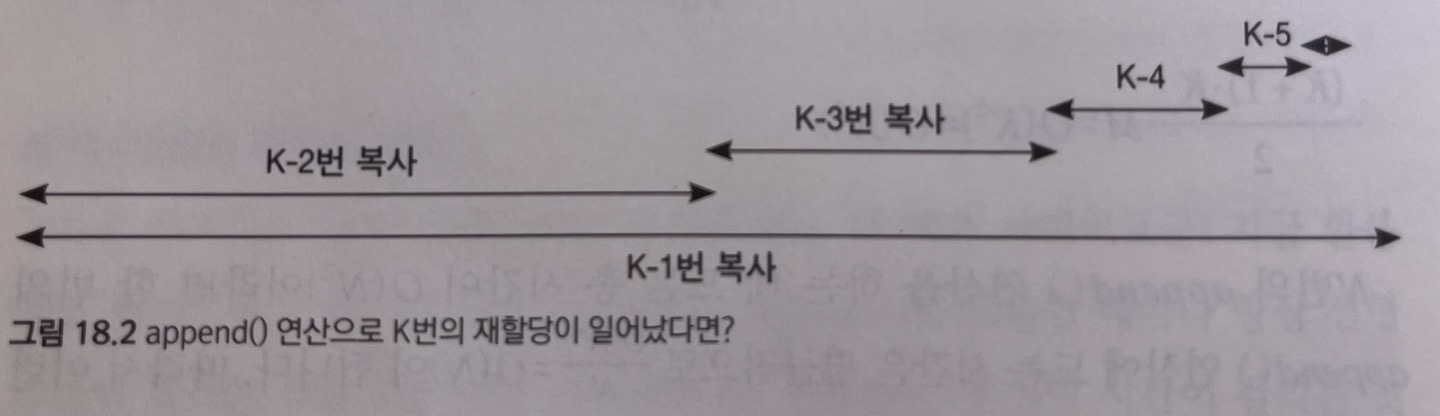


`그림 설명`  
- i번 재할당 시 복사하는 원소가 2^i  
- 마지막 재할당에 필요한 복사 수를 맨 아래(K-1번 복사)에 두면 위에 절반씩 K-2, K-3... 재할당 표현 가능
-처음부터 K-2 재할당까지 복사하는 원소 수 ≒ 마지막 K-1 재할당에서 복사하는 원소 수는 2^(K-1) = O(N), N은 배열 크기
- append() 연산 N번 했으므로 O(N)/N을 통해 한 번 append() 할 때 시간은 평균적으로 O(1)



&rarr; 상수 시간 되어 시간 문제가 해결, 특성 만족


### 표준 라이브러리의 동적 배열 구현
C++의 vector, 자바/C#의 ArrayList  
동적 배열 용량 미리 늘려두면 효율적


##18.3 연결리스트
---
배열 원소의 순서 유지하며 임의의 위치에 원소 삽입/ 삭제 할 때 문제점
<div/>
: 시간이 오래 걸림 (원소 개수에 선형비례하는 시간 O(N))

문제 해결-> 연결리스트(linked list) 고안
<div/>
: 특정 위치에서의 삽입, 삭제가 상수 시간에 가능 (O(1))

`연결 리스트 구현`
* 메모리에 <strong>원소</strong>가 흩어져 있다
  * 원소들은 이전원소, 다음 원소를 가리키는 <strong>포인터</strong> *(head, tail )* 갖는다
* 포인터만을 가진 클래스로 구현


In [ ]:
struct ListNode {
    int element; // 담고 있는 원소
    ListNode *prev, *next; // 이전 노드, 다음 노드의 포인터
}

### 연결 리스트 다루기
----
####`i 번째 노드 찾기`
- 머리부터 하나씩 포인터 따라가며 다음 노드 찾기
  - 리스트 길이에 선형 비례하는 시간

####`연결리스트에서 삽입과 삭제`
- 삽입/삭제할 노드와 그 노드의 이전/이후 노드의 포인터만 변경
  - 상수 시간


### 연결 리스트 응용 연산
잘 쓰이지는 않아서 그냥 알아만 두세요..
#### 잘라 붙이기(spicing) 연산
리스트 통째로 삽입 가능
연결 리스트 크기를 상수 시간에 알기 불가능

#### 삭제했던 원소 돌려놓기
`deleteNode()`로 연결 리스트에서 노드 x삭제가능<div/>
node의 정보는 유지, node 이전/이후 포인터만 변화<div/>
포인터가 자신의 위치 기억하기 때문에 가능<div/>
이전/이후노드 삭제된 상태에서는 사용 불가


연결 리스트에서 노드를 삭제하고 다시 추가 구현<div/>
조합 탐색(11장), 춤추는 링크들에 활용 가능하다고 합니다..

In [ ]:
//node 이전/이후 노드 포인터를 바꿔 node를 리스트에서 삭제
void deleteNode(ListNode* node) {
    node->prev->next = node->next;
    node->next->prev = node->prev;
}
//node 이전/이후 노드의 포인터를 바꿔 자기 자신을 다시 리스트에 삽입
void recoverNode(ListNode* node) {
    node->prev->next = node;
    node->next->prev = node;
}

## 18.4 동적 배열과 연결 리스트 비교

_i) 동적 배열과 연결 리스트 시간이 상수 시간으로 동일_  
이전/다음 원소 찾기  
맨 뒤에 원소 추가/삭제

_ii) 연결리스트는 상수 시간, 동적 배열은 선형 시간_  
맨 뒤 이외 위치에 원소 추가/삭제  

_iii) 동적 배열은 상수 시간, 연결리스트는 선형 시간_  
임의의 위치에서 원소 찾기  
크기 구하기    


>삽입/삭제를 하지 않거나 배열의 끝에서만 이루어지는 경우 `동적배열`이 항상 좋은 선택  
>임의의 원소가 아닌 모든 원소들 순회하며 삽입/삭제 하는 경우 `연결 리스트`가 좋은 선택





##조세푸스 문제 (문제 ID : JOSEPHUS, 난이도 : 하)

- 포위당한 N명(조세푸스와 N-1명의 병사들)이 원형으로 둘러 선 뒤 순서대로 자살
  - 자살 시작자로부터  시계방향으로 K 번째 살아 있는 사람이 자살
- 조세푸스와 다른 병사 하나만 살아남았을 때 항복하고 생존
- **마지막 생존자 두 명 중 하나가 되려면 조세푸스는 자살 시작자로부터 몇 자리 떨어져야 할까요?**

조건
- 시간 및 메모리 제한 : 1초 내 실행, 64MB 이하 메모리 사용
- 입력 : 입력 첫 번째 줄 테스트 케이스 개수 C(C=<50) 주어짐
  * 각 테스트 케이스는 두 개의 정수 N,K로 주어짐 (3=<N, K=<1000)

출력
- 각 테스트 케이스에 두 개 정수로, 마지막 생존자 두 명의 번호를 오름차순 출력
- 첫 번째 자살하는 병사 번호는 1, 다른 사람들의 번호는 첫 번째 병사에서부터 시계방향으로 정해진다



예시
입력  
2  
6 3  
40 3

출력  
3 5  
11 26  


예제 1) 포위당한 사람: 6, 그 사람으로부터 3번째 사람이 자살  
1번, 4번, 2번, 6번이 죽고 3번, 5번은 생존





In [ ]:
#연결 리스트 이용하여 조세푸스 문제 구현 가능
#리스트 준비, 죽을 사람을 포인터로 가리키기, 자살자 , 다음 사람으로 옮겨가기
void josepus(int n, int k) {
    //리스트 준비
    list<int> survivors;
    for(int i=1; i<= n; ++i) survivors.push_back();
    //이번에 죽을 사람을 나타내는 포인터
    list<int>::iterator kill = survivors.begin();
    while(n>2) {
        /첫 번째 사람 자살
        kill = survivors.erase(kill);
        if(kill == survivors.end()) kill = survivors.begin();
        --n;
        //k-1번 다음 사람으로 옮기기
        for(int i=0; i < k-1; ++i) {
            ++kill;
            if(kill ==survivors.end()) kill = survivors.begin();
        }
    }
    cout << survivors.front() << " " << survivors.back() << endl;
}

- 연결 리스트 문제
- 이번에 죽을 사람은 포인터 kill로 표시
- 포인터를 K-1번 앞으로 옮기기
- 시간 복잡도의 경우 N,K모두 1000보다 작음(문제 조건), 전체 시간 복잡도 O(NK) 이므로 시간 내 수행 가능
- 원형으로 연결된 연결 리스트 구현 위해 포인터 역할 하는 반복자가 리스트 끝에 도달하는지 매번 확인해서 처음으로 옮겨준다